In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from keras.utils.np_utils import to_categorical

In [ ]:
n_pts = 500
centers = [[-1,1],[-1,-1],[1,-1],[1,1],[0,0]]
X ,y = datasets.make_blobs(n_pts,random_state=123,centers=centers,cluster_std=0.4)


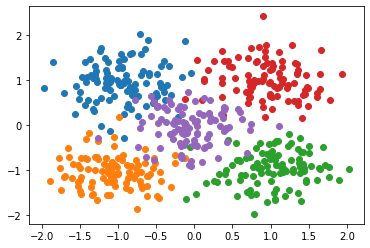

In [ ]:
plt.scatter(X[y==0, 0],X[y==0,1])
plt.scatter(X[y==1, 0],X[y==1,1])
plt.scatter(X[y==2, 0],X[y==2,1])
plt.scatter(X[y==3, 0],X[y==3,1])
plt.scatter(X[y==4, 0],X[y==4,1])

In [ ]:
print(y)
y_cat = to_categorical(y,5)
print(y_cat)

[3 3 4 0 2 1 1 4 4 4 3 2 1 0 2 4 4 4 3 0 3 0 3 4 1 3 1 0 4 2 3 1 0 4 1 0 4
 0 4 0 1 3 3 0 3 1 3 4 0 4 0 2 3 0 2 4 4 0 3 4 1 3 0 4 2 1 1 2 3 2 3 2 1 1
 3 2 4 2 2 3 0 2 4 3 2 1 3 3 3 3 1 1 4 2 4 4 1 2 4 1 4 2 2 3 4 1 1 3 3 2 1
 3 1 0 1 0 4 4 4 3 1 3 3 3 1 4 4 0 2 0 1 1 0 4 0 1 1 4 4 0 4 3 4 4 2 4 0 0
 0 4 2 0 4 1 0 2 2 1 3 0 1 2 2 4 4 1 3 2 3 3 3 2 2 2 4 0 1 1 0 1 4 4 3 2 3
 2 3 1 0 3 4 2 1 0 0 0 4 3 0 4 2 2 3 1 0 4 4 1 2 1 3 1 4 4 0 1 4 2 4 0 4 0
 1 2 3 0 1 0 3 3 4 3 4 0 0 1 1 3 0 4 1 4 2 1 2 4 4 3 3 1 1 1 4 1 1 1 4 3 1
 0 0 2 2 2 3 2 3 4 2 3 3 1 1 0 4 0 3 0 0 0 3 2 2 1 4 2 0 0 2 2 1 3 3 1 3 0
 0 1 4 2 2 2 1 0 0 1 0 0 1 2 4 2 4 2 1 3 0 0 1 4 1 2 4 4 4 3 4 1 2 3 1 3 1
 0 0 2 4 1 3 1 1 2 1 4 3 1 2 3 2 0 4 1 4 0 2 2 0 1 2 2 4 4 0 4 1 3 3 2 2 0
 4 3 3 1 2 2 4 3 0 3 3 3 3 0 1 4 4 4 0 3 3 2 4 0 4 0 0 4 2 2 2 3 0 2 0 0 1
 2 3 0 0 2 4 2 3 0 3 0 1 0 4 1 0 0 1 3 1 4 0 2 1 1 3 2 3 2 2 2 3 1 0 0 0 1
 3 4 2 1 0 2 1 4 3 3 4 0 0 2 2 0 0 2 2 3 4 3 2 2 2 2 0 1 3 0 2 1 2 0 2 3 4
 3 1 4 3 3 0 2 4 0 4 1 3 

In [ ]:
model = Sequential()
model.add(Dense(5,input_shape=(2,),activation='softmax'))
model.compile(Adam(0.1),loss = 'categorical_crossentropy',metrics = ['accuracy'])

In [ ]:
h = model.fit(x=X,y=y_cat,batch_size=50,epochs = 100,verbose=1)

Epoch 1/100
10/10 [==============================] - 1s 2ms/step - loss: 1.2388 - accuracy: 0.4420
Epoch 2/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6026 - accuracy: 0.8520
Epoch 3/100
10/10 [==============================] - 0s 2ms/step - loss: 0.4107 - accuracy: 0.9220
Epoch 4/100
10/10 [==============================] - 0s 2ms/step - loss: 0.3265 - accuracy: 0.9380
Epoch 5/100
10/10 [==============================] - 0s 2ms/step - loss: 0.2866 - accuracy: 0.9340
Epoch 6/100
10/10 [==============================] - 0s 2ms/step - loss: 0.2606 - accuracy: 0.9440
Epoch 7/100
10/10 [==============================] - 0s 3ms/step - loss: 0.2448 - accuracy: 0.9460
Epoch 8/100
10/10 [==============================] - 0s 2ms/step - loss: 0.2319 - accuracy: 0.9380
Epoch 9/100
10/10 [==============================] - 0s 2ms/step - loss: 0.2207 - accuracy: 0.9460
Epoch 10/100
10/10 [==============================] - 0s 2ms/step - loss: 0.2127 - accuracy: 0.9440
Epoch 11/

Text(0.5, 1.0, 'accuracy')

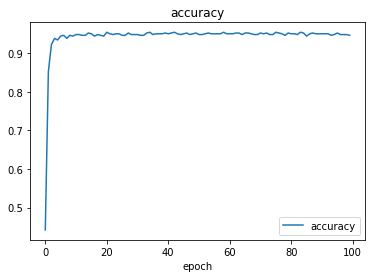

In [ ]:
plt.plot(h.history['accuracy'])
plt.xlabel('epoch')
plt.legend(['accuracy'])
plt.title('accuracy')

Text(0.5, 1.0, 'loss')

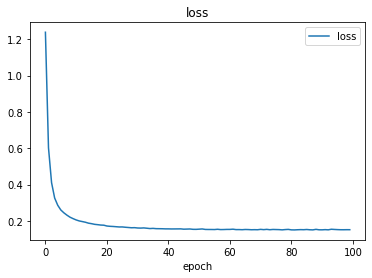

In [ ]:
plt.plot(h.history['loss'])
plt.xlabel('epoch')
plt.legend(['loss'])
plt.title('loss')

In [ ]:
def plot_decision_boundary(X, y_cat, model):
   x_span = np.linspace(min(X[:,0]) - 0.25, max(X[:,0]) + 0.25)
   y_span = np.linspace(min(X[:,1]) - 0.25, max(X[:,1]) + 0.25)
   xx , yy = np.meshgrid(x_span,y_span)
   xx_,yy_ = xx.ravel(),yy.ravel()
   grid = np.c_[xx_,yy_]
   pred_func = np.argmax(model.predict(grid), axis=-1)
   z = pred_func.reshape(xx.shape)
   plt.contourf(xx, yy, z)

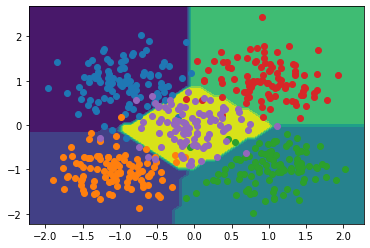

In [ ]:
plot_decision_boundary(X, y_cat, model)
plt.scatter(X[y==0, 0],X[y==0,1])
plt.scatter(X[y==1, 0],X[y==1,1])
plt.scatter(X[y==2, 0],X[y==2,1])
plt.scatter(X[y==3, 0],X[y==3,1])
plt.scatter(X[y==4, 0],X[y==4,1])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Prediction is [2]


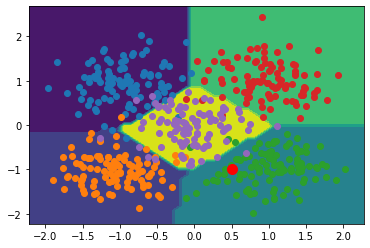

In [ ]:
plot_decision_boundary(X, y_cat, model)
plt.scatter(X[y==0, 0],X[y==0,1])
plt.scatter(X[y==1, 0],X[y==1,1])
plt.scatter(X[y==2, 0],X[y==2,1])
plt.scatter(X[y==3, 0],X[y==3,1])
plt.scatter(X[y==4, 0],X[y==4,1])
x=0.5
Y=-1
point = np.array([[x,Y]])
prediction = model.predict_classes(point)
plt.plot([x],[Y],marker = 'o',markersize=10,color='red')
print('Prediction is',prediction)
